In [4]:
#Smoothing : a technique applied to time series to remove the fine-grained variation between time steps.

import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline 

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [6]:
#Using AirPassengers Data 


In [7]:
data = pd.read_csv('C:\\Users\\GQPF6681\\Desktop\\math-for-mlv1-master\\maths\\statistics\\AirPassengers.csv')
print (data.head(10)) 

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
5  1949-06         135
6  1949-07         148
7  1949-08         148
8  1949-09         136
9  1949-10         119


In [8]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('C:\\Users\\GQPF6681\\Desktop\\math-for-mlv1-master\\maths\\statistics\\AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print(data)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
1949-06-01         135
1949-07-01         148
1949-08-01         148
1949-09-01         136
1949-10-01         119
1949-11-01         104
1949-12-01         118
1950-01-01         115
1950-02-01         126
1950-03-01         141
1950-04-01         135
1950-05-01         125
1950-06-01         149
1950-07-01         170
1950-08-01         170
1950-09-01         158
1950-10-01         133
1950-11-01         114
1950-12-01         140
1951-01-01         145
1951-02-01         150
1951-03-01         178
1951-04-01         163
1951-05-01         172
1951-06-01         178
...                ...
1958-07-01         491
1958-08-01         505
1958-09-01         404
1958-10-01         359
1958-11-01         310
1958-12-01         337
1959-01-01         360
1959-02-01         342
1959-03-01         406
1959-04-01         396
1959-05-01 

In [9]:
print(data.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


In [10]:
ts = data['Passengers']
print(ts.head(10))

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: Passengers, dtype: int64


In [11]:
print(ts['1949-01-01'])

112


In [12]:
print(ts['1949-01-01':'1949-05-01'])

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64


In [13]:
print(ts['1949'])

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64


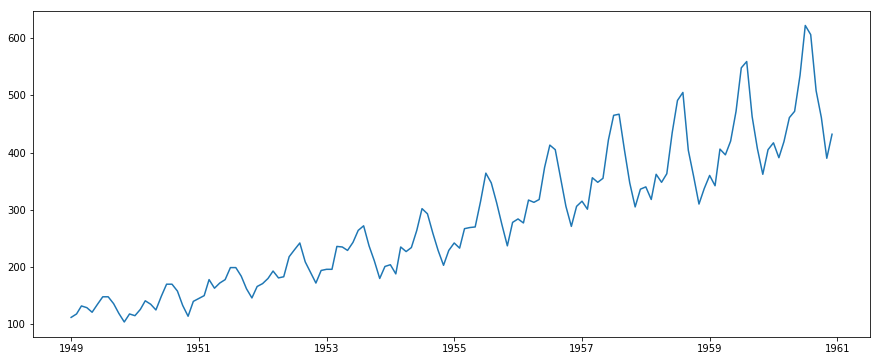

In [14]:
                                               #Testing stationarity of data 

#Data is stationary when the mean and variance are constant over time 
plt.plot(ts)
plt.show()

In [15]:
# in the above graph, there is an increasing overall trend with some seasonal variations 

In [16]:
# Most of the TS(Time series) models assume that the time series is stationary. 
# So it assumes that if the time series has a particular behavior over time, it is most probable that in future it will also follow the same behavior 


In [17]:
# Moving Average - it involves creating a new series where the values are comprised of the average of raw observations in the original time series.
# 2 types of moving averages - trailing and centered MA 
# A moving average requires that you specify a window size

#The “moving” part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series.

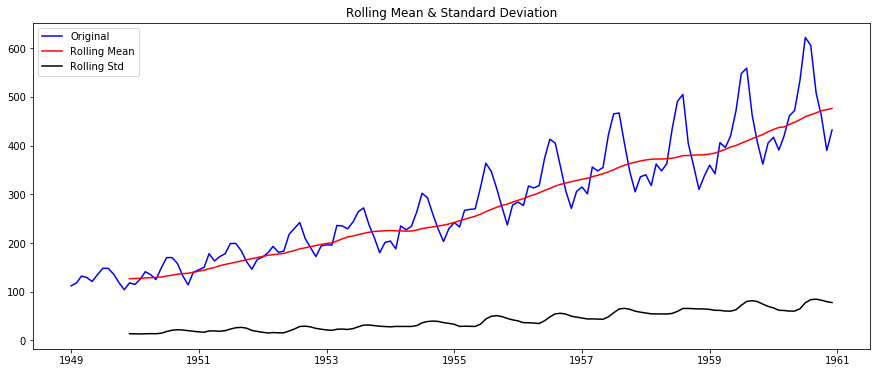

In [18]:
# using rolling statistics plot 
# in this type of graph, we plot moving averages/variances and see if it varies with time 
# moving average/variance means -  at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months.

rolmean = ts.rolling(window=12).mean()  # mean of rolling window 

rolstd = ts.rolling(window=12).std() #standard variation of rolling window #std variation is calculated instead of mean to keep the unit similar to mean 

#Plot rolling statistics:
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')  # "loc" means location of the legend. "best" for axes 

plt.title('Rolling Mean & Standard Deviation')
plt.show()




In [19]:
                                       # Making a time series stationary  
    
# 2 reasons why a time series is not stationary : Trend and Seasonality 

# Trend : varying mean over time 
# Seasonality : variations at specific time frames 

# we hve to model or estimate the trend and seasonality in the series 
# and remove those from the series to get a stationary series.
    

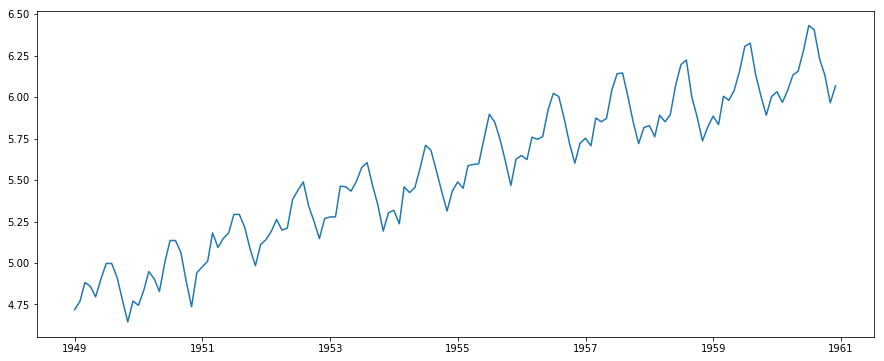

In [20]:
# removing trend - first trick to remov trend is "transformation" 
# For example, in this case we can clearly see that the there is a significant positive trend. 
# So we can apply "transformation" which penalize higher values more than smaller values by taking a log, square root, or cube root, etc. 

# Lets take a log transform here for simplicity:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

In [21]:
# to estimate the trend / model trend , we  can use following methods :- 

# - MA smoothing 
# - Polynomial fitting 
# - aggregation 

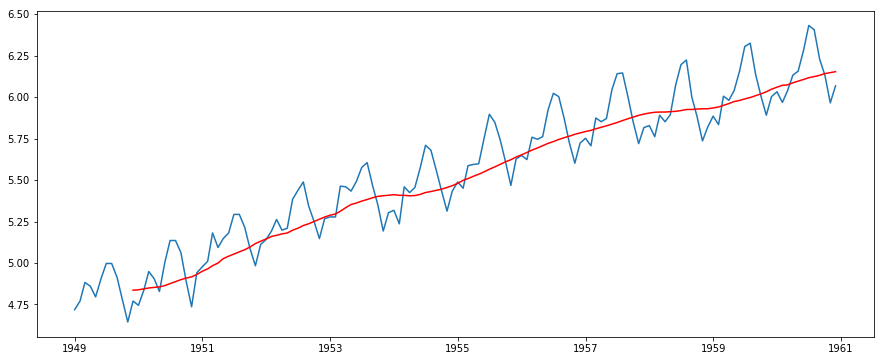

In [22]:
#Smoothing - Remove the rolling mean at any point
#Moving average smoothing 

moving_avg = ts_log.rolling(window=12).mean() #taking average of past 12 values i.e. 1 year 
plt.plot(ts_log)
plt.plot(moving_avg, color='red') #the red line in the following graph is the rolling mean 
plt.show()


In [23]:
#Since we will be using moving averages for the first 12 months, it's not applicable for 11 months 

ts_log_moving_avg_diff = ts_log - moving_avg
print(ts_log_moving_avg_diff.head(12))  #here, NAN predicted_values 

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: Passengers, dtype: float64


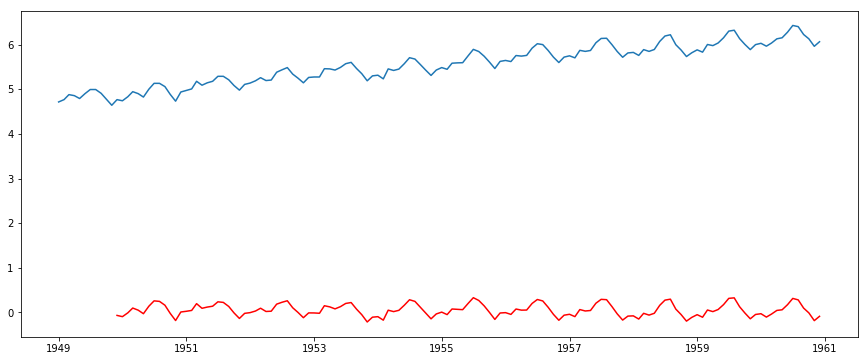

In [24]:
ts_log_moving_avg_diff.dropna(inplace=True) 
plt.plot(ts_log)
plt.plot(ts_log_moving_avg_diff, color='red')
plt.show()

In [25]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [26]:
# prepare data
data = ts_log

In [27]:
# create class
model = SimpleExpSmoothing(data)

c:\users\gqpf6681\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [29]:
#Why do we use ARIMA model - when stationary series have dependence among values 
# ARIMA : Auto Regressive Integrated Moving Averages 
# ARIMA forecasting of a time series is basically a linear equation(like in linear regression) having parameters p,q,d

# p : auto-regressive terms
# q : moving averages terms 
# d : number of differences 

In [30]:
# p : AR terms are lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

# q : MA terms are lagged forecast errors in prediction equation. 
#For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

# d : number of nonseasonal differences, i.e. in this case we took the first order difference. 

In [32]:
#ACF and PACF plots:

from statsmodels.tsa.stattools import acf, pacf

In [33]:
# "differencing" method is used for eliminating trend and seasonality 
ts_log_diff = ts_log - ts_log.shift() #first order differencing 
ts_log_diff.dropna(inplace=True)                               

In [ ]:
# differencing and decomposing methods are commonly used for eliminating trend and seasonality , particularly when seasonality is very high

# differencing - difference of the observation at a particular instant with that at the previous instant

In [34]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

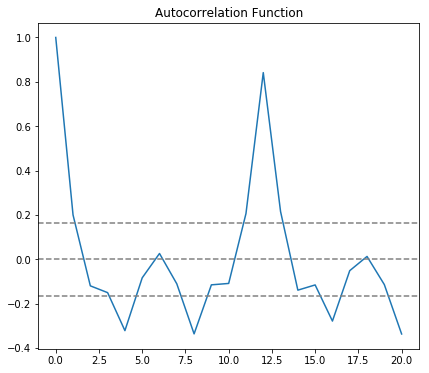

In [35]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [ ]:
# in the above ACF plot, p=2 as the line first cuts x-axis at point 2.0 

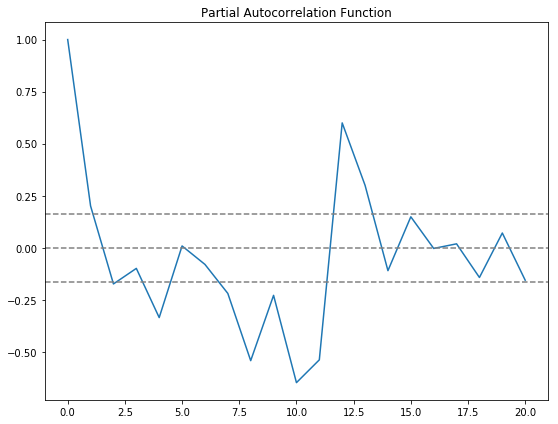

In [36]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [ ]:
# in the above PACF plot, the value of  q = 2

In [37]:
# In the above 2 plots of acf and pacf , 
# the 2 dotted lines on either sides of 0 are "confidence intervals" which are used to determine p and q values 

# p =  : where the PACF chart crosses the upper confidence interval for the first time.
# q =  : where the ACF chart crosses the upper confidence interval for the first time.

In [38]:
# ARIMA Model 
from statsmodels.tsa.arima_model import ARIMA

c:\users\gqpf6681\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\gqpf6681\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


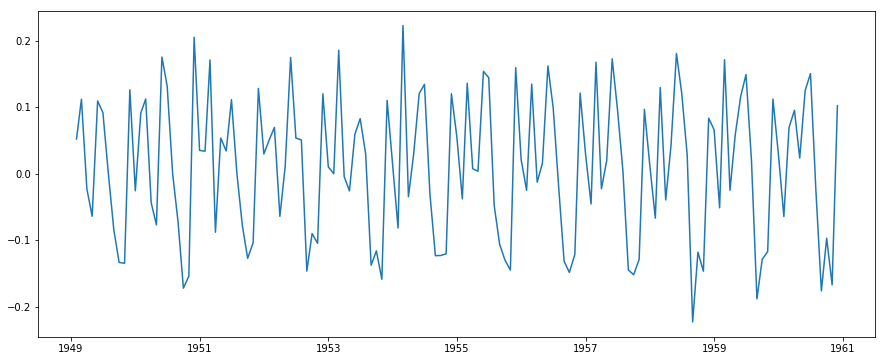

In [39]:
model = ARIMA(ts_log, order=(2, 1, 0))  #tuple of (p,d,q) 

results_AR = model.fit(disp=-1)    
plt.plot(ts_log_diff)


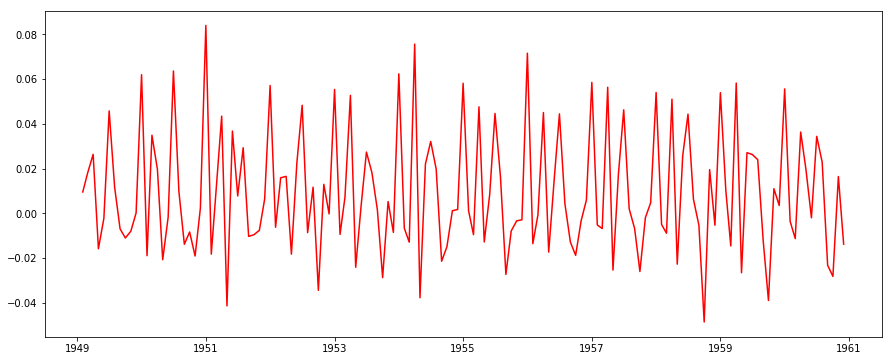

In [40]:
plt.plot(results_AR.fittedvalues, color='red')

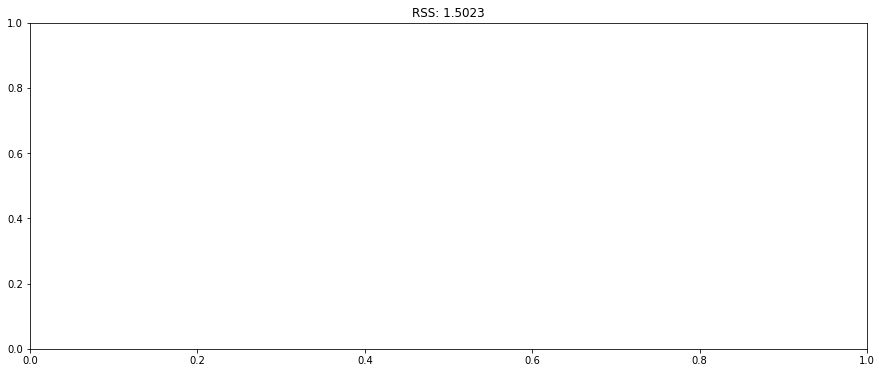

In [41]:
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2)) 

plt.show()

c:\users\gqpf6681\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\gqpf6681\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.5023')

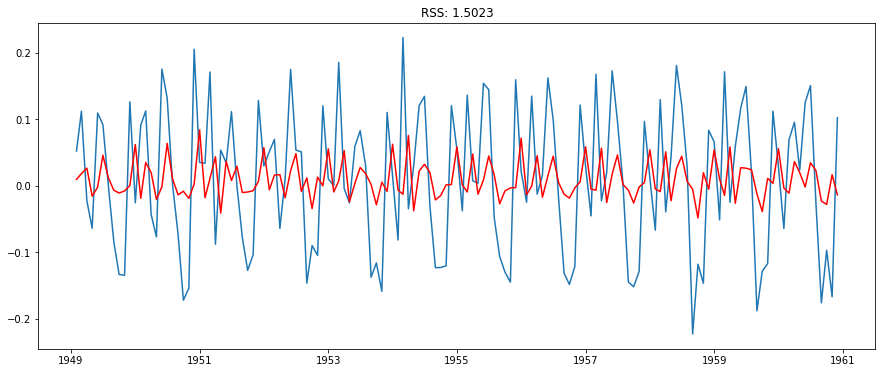

In [42]:
# AR Model 
model = ARIMA(ts_log, order=(2, 1, 0))  # tuple of (p,d,q)
results_AR = model.fit(disp=-1)          # what is disp = -1 ? 
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')   # from where the "fittedvalues" has come ? 
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))  # what is RSS ? 
                                                                       # basically what do we infer from the AR or MA or ARIMA plot ? 
                                                                       # what's the meaning of such intersection of the red and blue lines 

c:\users\gqpf6681\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\gqpf6681\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.4721')

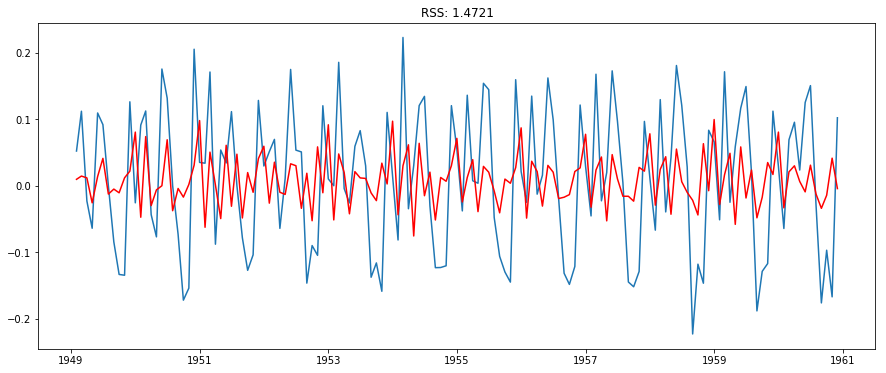

In [43]:
# MA Model 
model = ARIMA(ts_log, order=(0, 1, 2))  # tuple of (P,D,Q) #how come the values of P,D,Q ??
                                        # different from AR Model 
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

c:\users\gqpf6681\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\gqpf6681\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.4721')

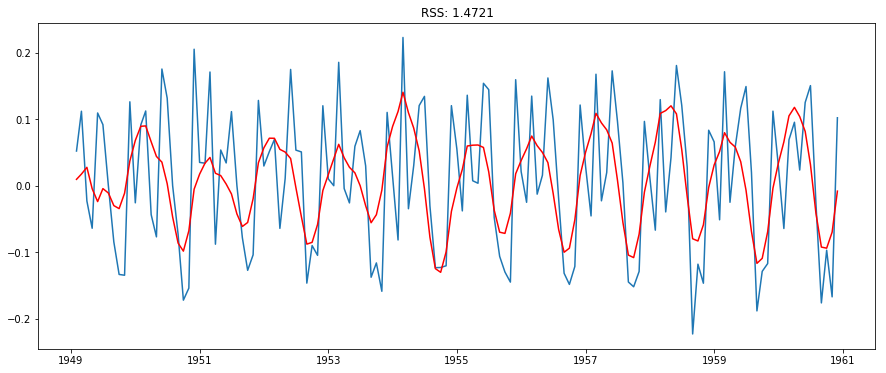

In [44]:
# ARIMA Model (combined model)

model = ARIMA(ts_log, order=(2, 1, 2))  # p= 1, d=1, q=2
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))